In [1]:
import pandas as pd

df_train = pd.read_csv('subset_train_expanded.csv')
df_valid = pd.read_csv('subset_valid_expanded.csv')
df_test = pd.read_csv('subset_test_expanded.csv')

In [2]:
INPUT_VARS = [
    'Air temperature [K]',
    'Process temperature [K]',
    'Rotational speed [rpm]',
    'Torque [Nm]',
    'Tool wear [min]'
]

X_train = df_train[INPUT_VARS]
X_valid = df_valid[INPUT_VARS]
X_test = df_test[INPUT_VARS]

y_train = df_train['Machine failure']
y_valid = df_valid['Machine failure']
y_test = df_test['Machine failure']

In [3]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [4]:
from sklearn.metrics import classification_report

y_train_hat = tree.predict(X_train)
y_valid_hat = tree.predict(X_valid)
y_test_hat = tree.predict(X_test)

print(classification_report(y_train, y_train_hat))
print(classification_report(y_valid, y_valid_hat))
print(classification_report(y_test, y_test_hat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6762
           1       1.00      1.00      1.00      6873

    accuracy                           1.00     13635
   macro avg       1.00      1.00      1.00     13635
weighted avg       1.00      1.00      1.00     13635

              precision    recall  f1-score   support

           0       0.69      0.99      0.82      1932
           1       0.98      0.57      0.72      1972

    accuracy                           0.78      3904
   macro avg       0.84      0.78      0.77      3904
weighted avg       0.84      0.78      0.77      3904

              precision    recall  f1-score   support

           0       0.67      0.99      0.80       967
           1       0.98      0.53      0.69       986

    accuracy                           0.76      1953
   macro avg       0.82      0.76      0.74      1953
weighted avg       0.83      0.76      0.74      1953



In [5]:
from sklearn.metrics import accuracy_score

def fitness_function(params):

    max_depth = params[0]
    min_samples_split = params[1]
    min_samples_leaf = params[2]
    min_weight_fraction_leaf = params[3]
    max_leaf_nodes = params[4]
    min_impurity_decrease = params[5]
    ccp_alpha = params[6]

    _tree = DecisionTreeClassifier(
        random_state=42,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        min_weight_fraction_leaf=min_weight_fraction_leaf,
        max_leaf_nodes=max_leaf_nodes,
        min_impurity_decrease=min_impurity_decrease,
        ccp_alpha=ccp_alpha
    )
    _tree.fit(X_train, y_train)
    _y_test_hat = _tree.predict(X_test)
    return (1 - accuracy_score(y_test, _y_test_hat))

In [6]:
from ecabc import ABC
from time import time

abc = ABC(250, fitness_function)
abc.add_param(1, 256, restrict=True, name='max_depth')
abc.add_param(2, 256, restrict=True, name='min_samples_split')
abc.add_param(1, 256, restrict=True, name='min_samples_leaf')
abc.add_param(0.0, 0.5, restrict=True, name='min_weight_fraction_leaf')
abc.add_param(2, 256, restrict=True, name='max_leaf_nodes')
abc.add_param(0.0, 256.0, restrict=True, name='min_impurity_decrease')
abc.add_param(0.0, 256.0, restrict=True, name='ccp_alpha')
abc.initialize()

ave_fitness = []
ave_ret_val = []
best_fitness = []
best_ret_val = []
best_params = []
for i in range(250):
    abc.search()
    print(f'Iteration: {i + 1} | {time()}')
    ave_fitness.append(abc.average_fitness)
    ave_ret_val.append(abc.average_ret_val)
    best_fitness.append(abc.best_fitness)
    best_ret_val.append(abc.best_ret_val)
    best_params.append(abc.best_params)

best_param_vals = abc.best_params

Iteration: 1 | 1637685102.181737
Iteration: 2 | 1637685104.393169
Iteration: 3 | 1637685106.727464
Iteration: 4 | 1637685108.777324
Iteration: 5 | 1637685110.8355908
Iteration: 6 | 1637685112.873534
Iteration: 7 | 1637685114.940653
Iteration: 8 | 1637685116.995748
Iteration: 9 | 1637685119.051625
Iteration: 10 | 1637685121.107357
Iteration: 11 | 1637685123.162451
Iteration: 12 | 1637685125.2030542
Iteration: 13 | 1637685127.2512121
Iteration: 14 | 1637685129.3020349
Iteration: 15 | 1637685131.351664
Iteration: 16 | 1637685133.414193
Iteration: 17 | 1637685135.463733
Iteration: 18 | 1637685137.507638
Iteration: 19 | 1637685139.553529
Iteration: 20 | 1637685141.6016388
Iteration: 21 | 1637685143.659968
Iteration: 22 | 1637685145.7300658
Iteration: 23 | 1637685147.783541
Iteration: 24 | 1637685149.839544
Iteration: 25 | 1637685151.903734
Iteration: 26 | 1637685153.9590468
Iteration: 27 | 1637685156.0191941
Iteration: 28 | 1637685158.091014
Iteration: 29 | 1637685160.150732
Iteration: 30 |

<Figure size 432x288 with 0 Axes>

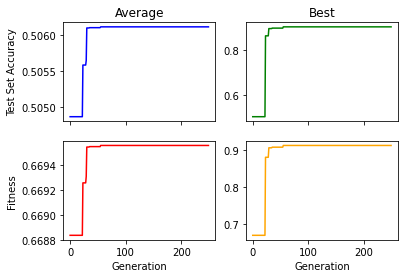

In [7]:
from matplotlib import pyplot as plt

generation = [i for i in range(len(ave_fitness))]

plt.clf()
fig, axs = plt.subplots(2, 2, sharex='col')
axs[1, 0].set_xlabel('Generation')
axs[1, 1].set_xlabel('Generation')
axs[0, 0].set_ylabel('Test Set Accuracy')
axs[1, 0].set_ylabel('Fitness')
axs[0, 0].set_title('Average')
axs[0, 1].set_title('Best')

ave_test_accuracy = [1 - i for i in ave_ret_val]
best_test_accuracy = [1 - i for i in best_ret_val]

axs[0, 0].plot(generation, ave_test_accuracy, color='blue')
axs[0, 1].plot(generation, best_test_accuracy, color='green')
axs[1, 0].plot(generation, ave_fitness, color='red')
axs[1, 1].plot(generation, best_fitness, color='orange')

plt.show()

In [8]:
print(best_param_vals)

max_depth = best_param_vals['max_depth']
min_samples_split = best_param_vals['min_samples_split']
min_samples_leaf = best_param_vals['min_samples_leaf']
min_weight_fraction_leaf = best_param_vals['min_weight_fraction_leaf']
max_leaf_nodes = best_param_vals['max_leaf_nodes']
min_impurity_decrease = best_param_vals['min_impurity_decrease']
ccp_alpha = best_param_vals['ccp_alpha']

tree = DecisionTreeClassifier(
    random_state=42,
    max_depth=max_depth,
    min_samples_split=min_samples_split,
    min_samples_leaf=min_samples_leaf,
    min_weight_fraction_leaf=min_weight_fraction_leaf,
    max_leaf_nodes=max_leaf_nodes,
    min_impurity_decrease=min_impurity_decrease,
    ccp_alpha=ccp_alpha
)
tree.fit(X_train, y_train)

y_train_hat = tree.predict(X_train)
y_valid_hat = tree.predict(X_valid)
y_test_hat = tree.predict(X_test)

print(classification_report(y_train, y_train_hat))
print(classification_report(y_valid, y_valid_hat))
print(classification_report(y_test, y_test_hat))

{'max_depth': 56, 'min_samples_split': 192, 'min_samples_leaf': 175, 'min_weight_fraction_leaf': 0.04071357633915684, 'max_leaf_nodes': 58, 'min_impurity_decrease': 0.0, 'ccp_alpha': 0.0}
              precision    recall  f1-score   support

           0       0.97      0.87      0.92      6762
           1       0.89      0.97      0.93      6873

    accuracy                           0.93     13635
   macro avg       0.93      0.92      0.92     13635
weighted avg       0.93      0.93      0.92     13635

              precision    recall  f1-score   support

           0       0.94      0.87      0.90      1932
           1       0.88      0.94      0.91      1972

    accuracy                           0.91      3904
   macro avg       0.91      0.91      0.91      3904
weighted avg       0.91      0.91      0.91      3904

              precision    recall  f1-score   support

           0       0.94      0.87      0.90       967
           1       0.88      0.94      0.91      